In [1]:
import numpy as np
import time
from copy import deepcopy

import qiskit 
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.quantum_info import state_fidelity
from qiskit.providers.aer import noise
from qiskit.visualization import iplot_state_city

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
import qiskit.ignis.mitigation.measurement as mc

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


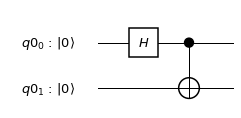

In [2]:
# Create the expected density matrix
q2 = QuantumRegister(2)
qc = QuantumCircuit(q2)
qc.h(q2[0])
qc.cx(q2[0], q2[1])

job = qiskit.execute(qc, Aer.get_backend('statevector_simulator'))
state = job.result().get_statevector(qc)
print(state)
qc.draw(output='mpl')

[0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]


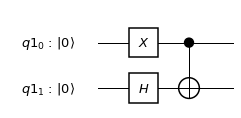

In [3]:
# Create the expected density matrix
q3 = QuantumRegister(2)
qc2 = QuantumCircuit(q3)
qc2.x(q3[0])
qc2.h(q3[1])
qc2.cx(q3[0], q3[1])

job = qiskit.execute(qc2, Aer.get_backend('statevector_simulator'))
state2 = job.result().get_statevector(qc2)
print(state2)
qc2.draw(output='mpl')

In [4]:
# Generate circuits and run on simulator
t = time.time()
qst_qc = state_tomography_circuits(qc, [q2[0],q2[1]])
job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots=5000)
print('Time taken:', time.time() - t)

tomo_qc = StateTomographyFitter(job.result(), qst_qc)

Time taken: 0.12563729286193848


In [5]:
# Generate circuits and run on simulator
t = time.time()
qst_qc2 = state_tomography_circuits(qc2, [q3[0],q3[1]])
job = qiskit.execute(qst_qc2, Aer.get_backend('qasm_simulator'), shots=5000)
print('Time taken:', time.time() - t)

tomo_qc2 = StateTomographyFitter(job.result(), qst_qc2)

Time taken: 0.1825118064880371


In [6]:
# Perform the tomography fit
# which outputs a density matrix
rho_qc = tomo_qc.fit()
fid_qc = state_fidelity(state, rho_qc)
print('Fit Fidelity =', fid_qc)

Fit Fidelity = 0.9970263341873092


In [9]:
# Perform the tomography fit
# which outputs a density matrix
rho_qc2 = tomo_qc2.fit()
fid_qc2 = state_fidelity(state2, rho_qc2)
print('Fit Fidelity =', fid_qc2)

Fit Fidelity = 0.9989651472091794
